**STROKE PREDICTION**

**Descrizione Problema**

Il dataset contiene informazioni per prevedere quando un individuo ha maggiori possibilità di essere colpito da un ictus. Il dataset contiene informazioni su oltre 5000 pazienti. L'obiettivo è quello di predire una variabile discreta binaria.testo in corsivo

# Importo Librerie necessarie

In [277]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score


In [278]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from keras.utils.vis_utils import plot_model

#  Models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm


# Preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 
from sklearn.preprocessing import LabelEncoder

# Scoring
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

# Hyperparameters and features importance
from sklearn.model_selection import GridSearchCV

# remove verison errors
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Informazioni sul dataset

**Importo Dataset**

In [279]:
df = pd.read_csv('input/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]

In [280]:
df.shape

(5110, 12)

Il dataframe ha 12 colonne:

id: unique identifier

id: identificatore univoco

gender:"Male","Female" o "Other"

age:età del paziente

hypertension: 0 se il paziente non soffre di ipertensione, 1 if the paziente ha ipertensione

heart_disease: 0 se non soffre di disturi cardiaci, 1 altrimenti

ever_married:"No" o "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" o "Self-employed"

avg_glucose_level: livello glucosio medio nel sangue: "Rural" o "Urban"

Residence_type: "Rural" o "Urban"

bmi: body mass index

moking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

La variabile target è stroke, che come già detto assume valore 1 se il paziente ha avuto un ictus, e 0 altrimenti.

il dataset è formato da 5110 record e ha 12 colonne.

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Il dataset presenta dei valori nulli per bmi (201) valori nulli. Inoltre contiene sia variabili numeriche che categoriche:
* Categoriche: gender, ever_married, work_type, Residence_type, smoking_status
* Binarie numeriche: hypertension,heart_disease, stroke
* Continue numeriche: age, avg_glucose_level, bmi

Provo a vedere se la variabile target "stroke" risulta essere bilanciata (essendo binaria, 50% =1 e 50%=0)

In [282]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Non è bilanciato, e quindi prima di lavorarci, sarà necessario bilanciarlo.

Sistemo i valori nulli di bmi. Non li sistemo ora, ma intanto faccio in modo di assegnargli un valore negativo per distinguerli dagli altri.

In [283]:
bmi_std=df.bmi.std

In [284]:
df.dropna(inplace=True)

# Rappresentazione grafica

Divido le variabili tra numeriche e categoriche

In [285]:
df_num=['age', 'avg_glucose_level','bmi']
df_cat=["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]

**Variabili categoriche:**

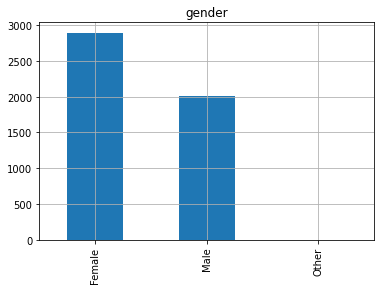

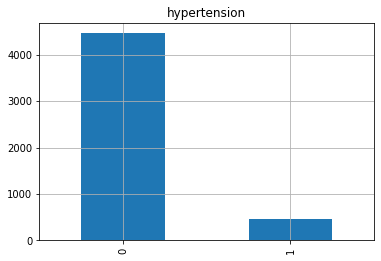

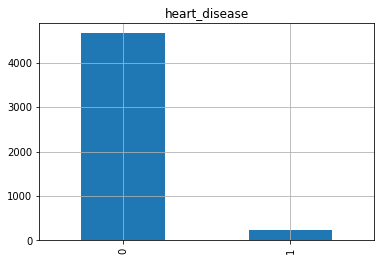

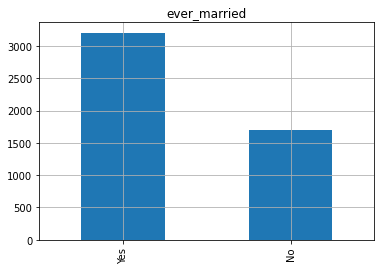

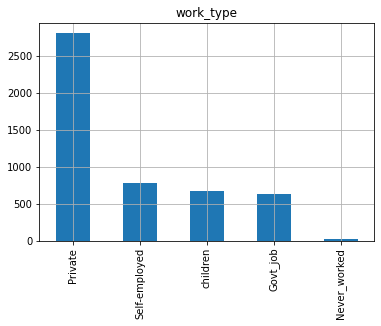

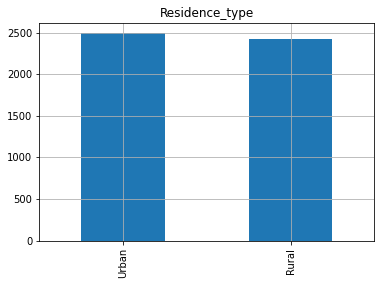

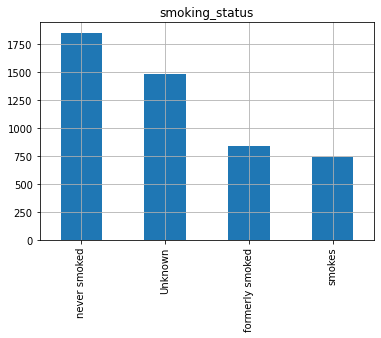

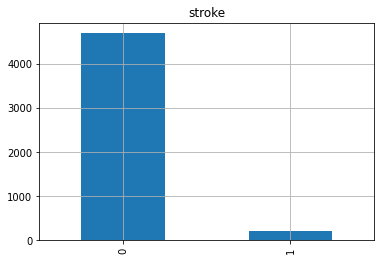

In [286]:
for cat in df_cat:
  df[cat].value_counts().plot(kind='bar')
  plt.title(cat)
  plt.grid()
  plt.show()

Una cosa che si può notare dai grafici delle variabili categoriche, è che nel sesso oltre a maschio e femmine, è presente anche other. Tuttavi è presente in piccolissime frequenze, per cui è meglio rimuoverlo.

In [287]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

**Variabili numeriche:**

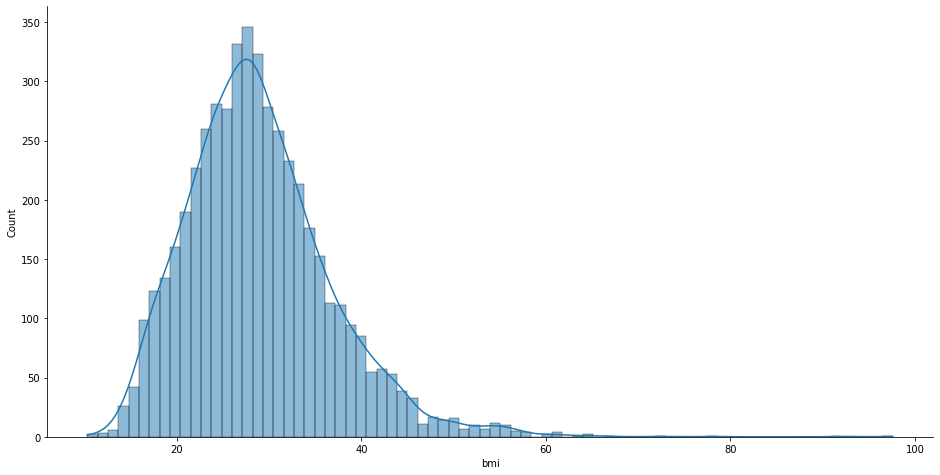

In [288]:
for cat in df_num:
  
  g=sns.displot(df[cat],kde=True)
  g.fig.set_size_inches(15,7)

Si osserva come molte persone abbiano un indice bmi e un livello medio di glucosio nella norma.

Come si vede, nel grafico sono presenti nei valori di glucosio e bmi vari valori di outline che potrebbero compromettere le future misure.

**Box plot num variables:**

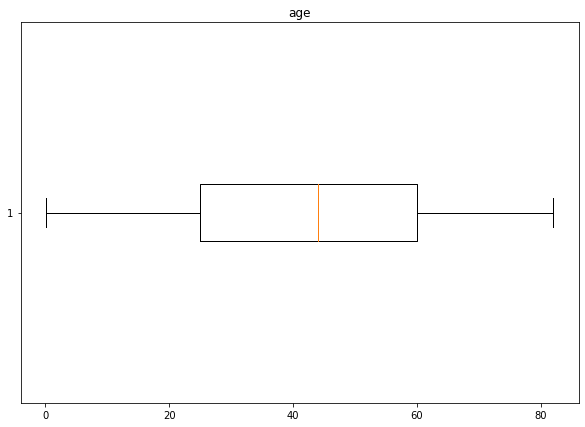

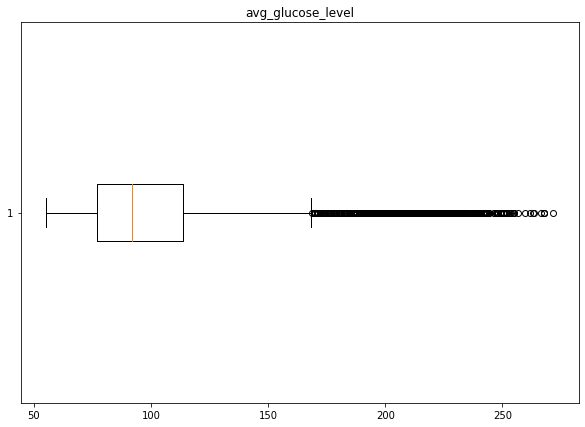

In [289]:
for num in df_num:

  fig=plt.figure(figsize=(10,7))
  plt.boxplot(df[num],vert=0)
  plt.title(num)

**Grafici con 2 features**

**Relazione con variabile Stroke:**

Age-Stroke:

In [290]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
fig.suptitle('No Stroke vs Stroke by age')

sns.distplot(df[df['stroke'] == 0]["age"], color='green',ax=ax[0]) # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["age"], color='red',ax=ax[0]) # Stroke - Red
sns.lineplot(x ='age', data=df, y = 'stroke',ax=ax[1])
df.plot(ax=ax[2], kind='scatter', x='age', y='stroke', alpha = 0.2,xlim=(0,100))




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Da entrambi i grafici si può vedere come la possibilità di 'stroke' aumenti con l'aumentare dell'età, iniziando a salire all'incirca verso i 30-35 anni.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


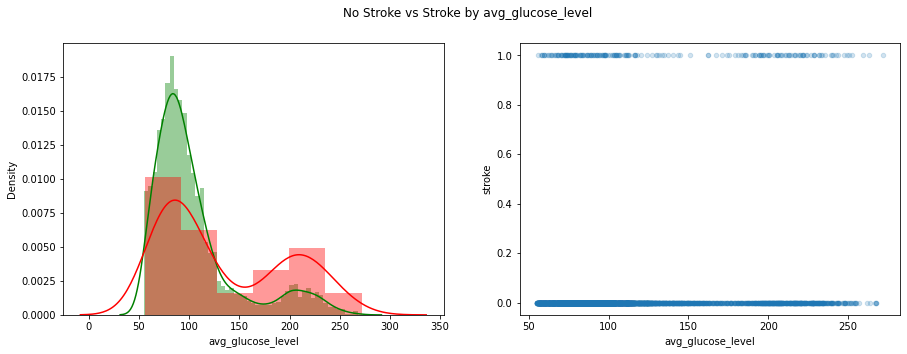

In [291]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle('No Stroke vs Stroke by avg_glucose_level')

sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green',ax=ax[0]) # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red',ax=ax[0]) # Stroke - Red
df.plot(ax=ax[1], kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)


Dai 2 grafici si riesce a vedere come le 2 estremità dei valori di glucosio (troppo alto e troppo basso), abbiano una maggiore frequenza di 'stroke',mentre valori compresi tra i 150 e i 180 sembrano avere meno casi.

BMI-Stroke:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


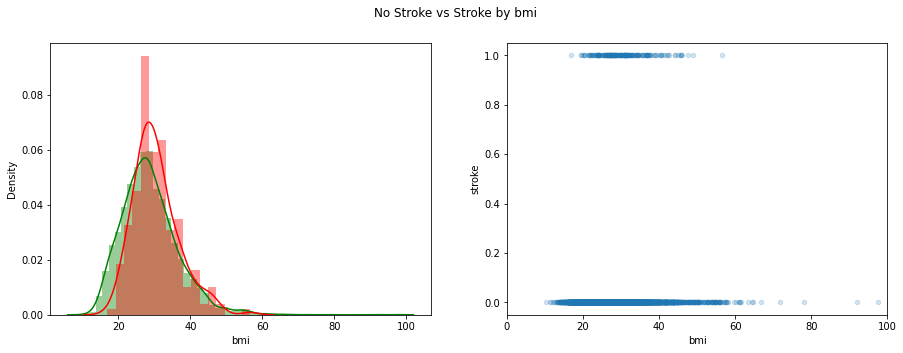

In [292]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle('No Stroke vs Stroke by bmi')

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green',ax=ax[0]) # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red',ax=ax[0]) # Stroke - Red
df.plot(ax=ax[1], kind='scatter', x='bmi', y='stroke', alpha = 0.2,xlim=(0,100))


Non sembra esserci una particolare relazione tra valori di bmi e stroke.

Ora metto in relazione con stroke le altre variabili.

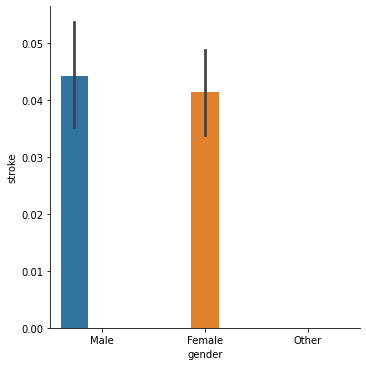

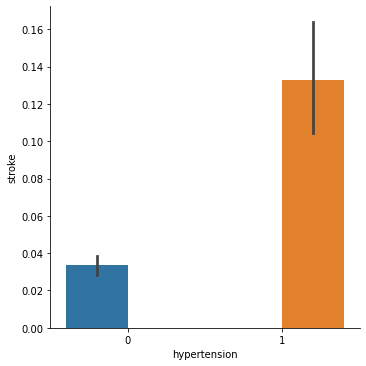

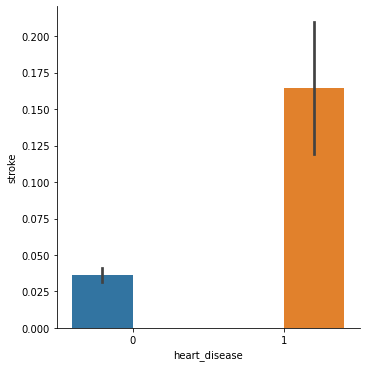

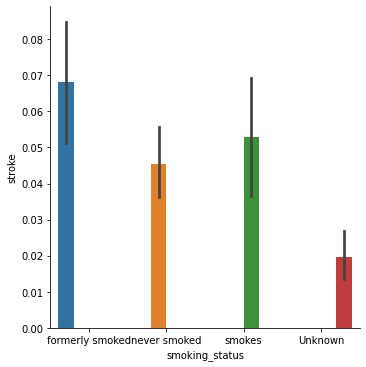

In [293]:
for cat in df_cat:
  if cat=='stroke':
    continue
  sns.catplot(x=cat, y="stroke", hue=cat, kind="bar", data=df)


Dai seguenti grafici, riesco a capire varie informazioni:


> 1. Il sesso non sembra influezare la probabilità di avere uno stroke.
> 2. I soggetti che soffrono di ipertensione sono più soggetti ad avere ictus, cosi come chi soffre di problemi cardiaci o è spostato.
> 3. Tra i lavoratori sembra che quelli che abbiano maggiore possibilità siano i 'self employee', mentre è molto bassa la frequenza dei bambini
> 4. La residenza non sembra avere alcuna influenza.
> 5. Chi ha fumato in precedenza sembra avere una maggiore possibilità di avere un ictus.



# Data cleaning

**Droppo il gender Other**

In [354]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].value_counts()

0    2806
1    1985
Name: gender, dtype: int64

**Possibili Outlier**


Controllo l'effetto che i valori di borso potrebbero avere e decido se tenerli o no. In particolare su bmi e su avg_glucose_level, dove i valori massimi si dovrebbero aggirare sui 50 per il bmi e circa 200 per il glucosio.

In [355]:
cond1=df['avg_glucose_level']>=200
cond2=df['bmi']>=50
cond=df['stroke']==1

print('Record con glucosio > 200 : {}'.format(df[cond1].shape[0]))
print('Record con ibm>50: {}'.format(df[cond2].shape[0]))
print('Record con glucosio>200 e stroke=1: {}'.format(df[cond1 & cond].shape[0]))
print('Record con bmi>50 e stroke=1: {}'.format(df[cond2 & cond].shape[0]))

Record con glucosio > 200 : 366
Record con ibm>50: 0
Record con glucosio>200 e stroke=1: 46
Record con bmi>50 e stroke=1: 0


Come si può vedere, mentre c'è una buona dose di dati con un livello di glucosio >=200, un valore di bmi fuori norma risulta meno frequente, e quindi può essere eliminato senza grossa perdita di informazioni.

In [356]:
df.drop(df[df['bmi'] > 47].index, inplace = True)


In [357]:
df.describe()

id       gender  ...  smoking_status       stroke
count   4791.000000  4791.000000  ...     4791.000000  4791.000000
mean   37177.962012     0.414319  ...        1.371947     0.042997
std    20965.870534     0.492655  ...        1.069133     0.202872
min       77.000000     0.000000  ...        0.000000     0.000000
25%    18753.000000     0.000000  ...        0.000000     0.000000
50%    37668.000000     0.000000  ...        2.000000     0.000000
75%    55344.000000     1.000000  ...        2.000000     0.000000
max    72940.000000     1.000000  ...        3.000000     1.000000

[8 rows x 12 columns]

Uso il label encoder per occuparmi delle variabili categoriche e trasformarle in numeriche

In [358]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df_cat:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4791 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4791 non-null   int64  
 1   gender             4791 non-null   int64  
 2   age                4791 non-null   float64
 3   hypertension       4791 non-null   int64  
 4   heart_disease      4791 non-null   int64  
 5   ever_married       4791 non-null   int64  
 6   work_type          4791 non-null   int64  
 7   Residence_type     4791 non-null   int64  
 8   avg_glucose_level  4791 non-null   float64
 9   bmi                4791 non-null   float64
 10  smoking_status     4791 non-null   int64  
 11  stroke             4791 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 646.6 KB


Ho convertito le feature categoriche in numeriche, in modo da poterle usare più facilmente in seguito.

In [360]:
for col in df_cat:
  print(df[col].value_counts())

0    2806
1    1985
Name: gender, dtype: int64
0    4361
1     430
Name: hypertension, dtype: int64
0    4549
1     242
Name: heart_disease, dtype: int64
1    3112
0    1679
Name: ever_married, dtype: int64
2    2727
3     758
4     671
0     613
1      22
Name: work_type, dtype: int64
1    2439
0    2352
Name: Residence_type, dtype: int64
2    1800
0    1458
1     813
3     720
Name: smoking_status, dtype: int64
0    4585
1     206
Name: stroke, dtype: int64


**Correlazione tra variabili**

Cerco quali variabili sono maggiormente correlate con la nostra variabile target "stroke".

Text(0.5, 1.0, 'Correlation Map')

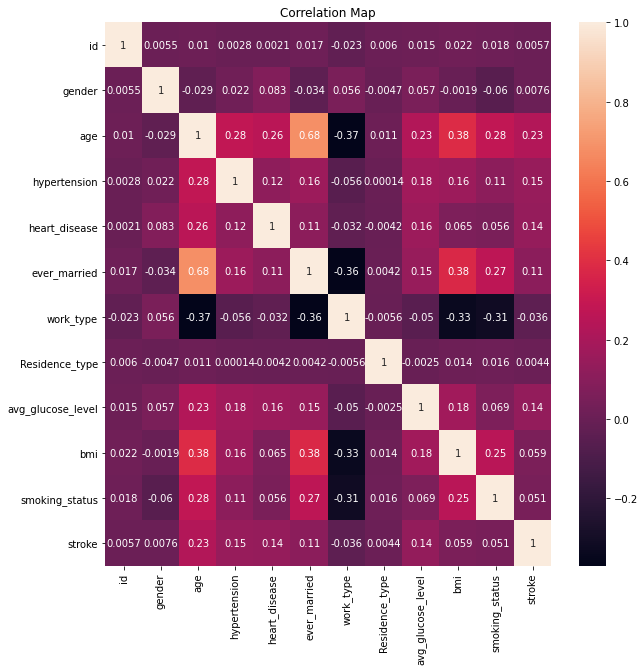

In [363]:
fig, ax = plt.subplots(figsize=(10,10))

corr=df.corr(method='pearson')
heatmap=sns.heatmap(corr,annot=True)
heatmap.set_title('Correlation Map')

Come è possibile vedere, le variabili che influenzano maggiormente la variabile target "stroke" sono:age,hypertension, heart_disease, ever_married e avg_glucose_level.
Una cosa interessante da notare, è che la variabile 'age' (quella che sembra incidere maggiormente sulla variabile 'stroke'), incide in modo importante anche sulle variabili: 'hypertension','avg_glucose_level','heart_disease','ever_married', che incidono in maniera rilevante anche sulla variabile target.

Tra le altre variabili invece, quelle che sembrano più dipendenti una dall'altra sono 'age' e 'ever_married'.

In [362]:
df.describe

<bound method NDFrame.describe of          id  gender   age  ...   bmi  smoking_status  stroke
0      9046       1  67.0  ...  36.6               1       1
2     31112       1  80.0  ...  32.5               2       1
3     60182       0  49.0  ...  34.4               3       1
4      1665       0  79.0  ...  24.0               2       1
5     56669       1  81.0  ...  29.0               1       1
...     ...     ...   ...  ...   ...             ...     ...
5104  14180       0  13.0  ...  18.6               0       0
5106  44873       0  81.0  ...  40.0               2       0
5107  19723       0  35.0  ...  30.6               2       0
5108  37544       1  51.0  ...  25.6               1       0
5109  44679       0  44.0  ...  26.2               0       0

[4791 rows x 12 columns]>

#Modelli

Ora passo alla costruzione dei modelli: nel pezzo di codice qua sotto, trasformo le variabili categoriche in numeriche, e mi costruisco 3 tipi di test e train:
1)Raw -> senza normalizzazione  o standardizzazione
2) Normalize -> con normalizzazione
3) Standardizzato

Poi per ogni dataset test, vado a bilanciare i dati attraverso Smote (va ad aumentare i valori di stroke =1 bialnciando il dataset). Questa operazione va fatto sul training set per non andare ad intoccare i dati del test set.


##Preparazione trainining e test set

In [331]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df_stroke_tr = df.copy()
df_stroke_tr = df_stroke_tr.drop(columns=['id'])

for cat in df_cat:
  df_stroke_tr[cat]= label_encoder.fit_transform(df_stroke_tr[cat])
    
  df_stroke_tr[cat].unique()


X = df_stroke_tr.drop(['stroke'],axis=1)
y = df_stroke_tr['stroke']

X_copy=X.copy()

sm = SMOTETomek(random_state=42)
X,y = sm.fit_resample(X, y.ravel())

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021, stratify=y)

lungh=len(X_test)

X_train_raw = X_train.copy()
X_test_raw = X_test.copy()
y_train_raw = y_train.copy()
y_test_raw = y_test.copy()

#X_train,y_train = sm.fit_resample(X_train, y_train.ravel())


X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
y_train_norm = y_train.copy()
y_test_norm = y_test.copy()
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train_norm)
X_test_norm = norm.transform(X_test_norm)

#X_train_norm,y_train_norm = sm.fit_resample(X_train_norm, y_train_norm.ravel())


X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
y_train_stand = y_train.copy()
y_test_stand = y_test.copy()
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train_stand)
X_test_stand = scaler.transform(X_test_stand)

#X_train_stand,y_train_stand = sm.fit_resample(X_train_stand, y_train_stand.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [332]:
feature_scaling = {
    'Raw':(X_train_raw, X_test_raw, y_train_raw, y_test_raw),
    'Normalization':(X_train_norm, X_test_norm, y_train_norm, y_test_norm),
    'Standardization':(X_train_stand, X_test_stand, y_train_stand, y_test_stand),
}

In [333]:


def predict_model(model,X,proba=False):
    if ~proba:
      y_pred = model.predict(X)
    else:
      y_pred_proba = model.predict_proba(X)
      y_pred = np.argmax(y_pred_proba, axis=1)

    return y_pred
models= {}
def grid_search(name,model,param,kf,x_train,x_test,y_train,y_test,fc,scoring=None,proba=False,cond=True):
  grid = GridSearchCV(estimator=model,param_grid = param, scoring = 'accuracy',cv = kf)
  model=grid.fit(x_train, y_train)
  y_pred=predict_model(model, x_test, proba)

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  mse=mean_squared_error(y_test, y_pred)

  print('Model: ',name,'      Tipo: ',fc)
  print('')
  print('')
  
  #plot_confusion_matrix(model, X_test, y_test, cmap='Blues');    
  #plt.show()

  score=model.score(X_test, y_test)

  best_accuracy = model.best_score_
  best_param = model.best_params_
  print('{}:\nBest Accuracy : {:.2f}%'.format(model,best_accuracy*100))
  print('Best Parameters : ',best_param)

  print('')

  print('Risultati precisione:')
  print('accuracy: ', accuracy)
  print('recall: ',recall)
  print('precision: ', precision)
  print('Mse: ', mse)
  print('f1: ', f1)


  print(classification_report(y_test, y_pred))
  print('')
  print('Matrice di confusione:')
  plot_confusion_matrix(model, X_test, y_test, cmap='Blues');    
  plt.show()

  model1=model.best_estimator_
  if cond:
    pc=pd.Series(model1[1].coef_[0],index=X_copy.columns)
    print('')
    print('Coefficienti:')
    print(pc)
  #pc.plot(kind='barh')
  #print('')
  #print('----------------')
  #print('')
  models[name,fc]={'Model': model,'Score': score}
  model=models[name,fc]
  model['Precision']=precision
  model['Accuracy']=accuracy
  model['Recall']=recall
  model['F1']=f1
  model['MSE']=mse
  return model1, score

Alla fine di ogni modello, stamperò i risultati ottenuti dal modello riguardo i valori di accuratezza, recall,precisione, f1 score e il best_score con i migliori parametri.
Questo per essere sicuro che il modello sia stato addestrato adeguatamente, e che non restituisca un valore di accuratezza alto solo perchè il dataset è originariamente sbilanciato.
Stampo anche i coefficienti che sono stati tenuti, per vedere come hanno influenzato il modello.

##Perceptron

Model:  Perceptron       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Perceptron(alpha=0.0001,
                                                   class_weight=None,
                                                   early_stopping=False,
                                                   eta0=1.0, fit_intercept=True,
                                                   max_iter=1000,
                                                   n_iter_no_change=5,
                                                   n_jobs=None, penalty=None,
         

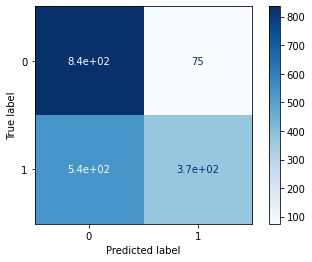


Coefficienti:
gender               0.000000
age                  0.000000
hypertension         0.281722
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------

Model:  Perceptron       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Perceptron(alpha=0.001,
                                                   class_weigh

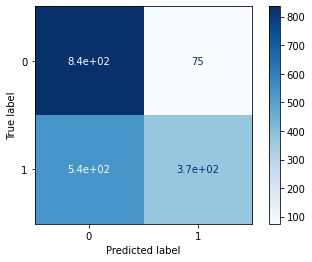


Coefficienti:
gender               0.000000
age                  0.000000
hypertension         0.281722
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------

Model:  Perceptron       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Perceptron(alpha=0.001,
                                                   class_wei

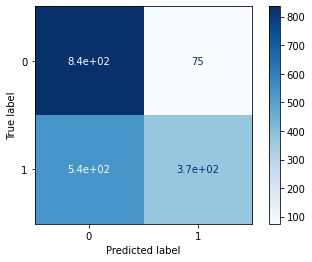


Coefficienti:
gender               0.000000
age                  0.000000
hypertension         0.281722
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------



In [334]:
from sklearn.linear_model import Perceptron
kf = KFold(n_splits=5, shuffle=True, random_state=42)


model = Pipeline([
    ('scaler',StandardScaler()),
    ("model",  Perceptron())
])

grid={
    "scaler": [None, StandardScaler()],
    "model__penalty": ["l2", "l1", "elasticnet"],
    "model__alpha": np.logspace(-3, 3, 7),
    "model__fit_intercept": [False, True]
}

i=0
j=model_names.index('Perceptron')
for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    model,score=grid_search('Perceptron',model,grid,kf,X_train,X_test,y_train,y_test,fc_name)
    #pc=pd.Series(model[1].coef_[0],index=X_copy.columns)
    #pc.plot(kind='barh')
    print('')
    print('--------------------------------------------')
    print('')

Come è possibile vedere, il modello con una precisione maggiore risulta essere il primo, quello con i dati di tipo 'Raw'. I primi 2 modelli risultano essere addestrati bene, infatti il best_score non si differenzia molto dal f1_score e dall'accuracy (best_score è sul training set, mentre gli altri sul test set).

Il primo modello tiene come coefficienti solo l'età (che come avevamo visto era la variabile da coi 'stroke' era influenzata maggiormente. Mentre il secondo tiene conto oltre che ad age anche di ipertensione.


##Logistic Regression

Model:  Logistic_Regression       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                        

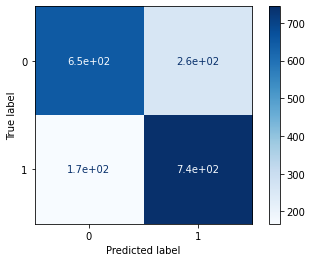


Coefficienti:
gender               0.000000
age                  1.517642
hypertension         0.252984
heart_disease        0.092617
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.116743
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------

Model:  Logistic_Regression       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        LogisticRegression(C=0.01,
                                                  

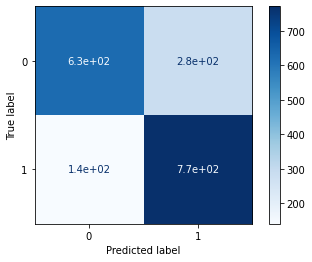


Coefficienti:
gender               0.000000
age                  3.592580
hypertension         0.511917
heart_disease        0.053983
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------

Model:  Logistic_Regression       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler', None),
                                       ('model',
                                        LogisticRegression(C=0.01,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

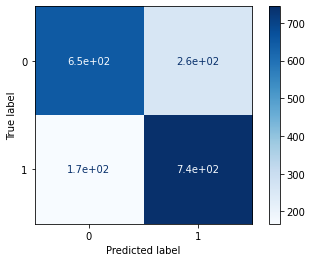


Coefficienti:
gender               0.000000
age                  1.517642
hypertension         0.252984
heart_disease        0.092617
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.116743
bmi                  0.000000
smoking_status       0.000000
dtype: float64

--------------------------------------------



In [335]:
from sklearn.linear_model import Perceptron
kf = KFold(n_splits=5, shuffle=True, random_state=42)


model = Pipeline([
    ('scaler',StandardScaler()),
    ("model",  LogisticRegression(solver='liblinear',random_state=42))
])

grid={
    "scaler": [None, StandardScaler()],
    "model__penalty": ["l2", "l1"],
    "model__C": np.logspace(-4, 2, 7),
    "model__fit_intercept": [False, True]
}

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    model,score=grid_search('Logistic_Regression',model,grid,kf,X_train,X_test,y_train,y_test,fc_name)
    print('')
    print('--------------------------------------------')
    print('')

Nella logistic Regression, tutti i modelli hanno ottenuti più o meno lo stesso risultato, sia di in termini di best_accuracy che di precisione sul test set.
I coefficienti sono molto simili, e il più importante è sempre quello relativo all'età (age).

##SVC

Model:  SVC       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False, random_state=42,
                      

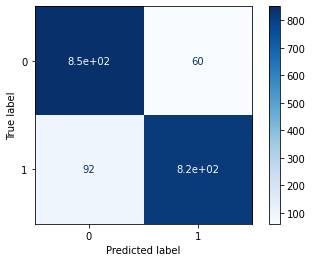


-------------------------------

Model:  SVC       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=Fa

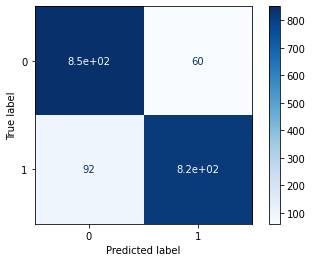


-------------------------------

Model:  SVC       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=

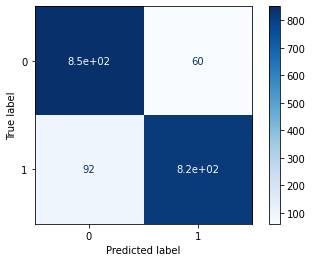


-------------------------------



In [336]:
model = Pipeline([
    ('scaler',StandardScaler()),
    ("model",  SVC(random_state=42))
])

grid = {
    'model__kernel': ['rbf'],
    'model__C': [0.01, 0.1, 1],
}

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    grid_search('SVC',model,grid,kf,X_train,X_test,y_train,y_test,fc_name,cond=False)
    print('')
    print('-------------------------------')
    print('')

##K NEIGHBORS CLASSIFIER

Model:  KNeighbors       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                            


---------------------------------

Model:  KNeighbors       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=1, p=2

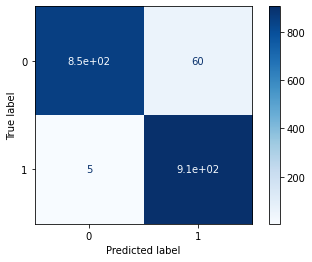


---------------------------------

Model:  KNeighbors       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=1, p

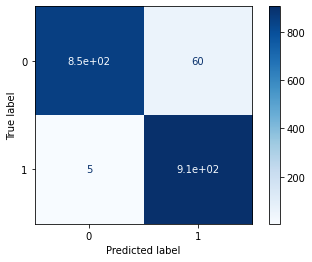


---------------------------------



In [337]:
model = Pipeline([
    ('scaler',StandardScaler()),
    ("model", KNeighborsClassifier(n_jobs=-1))
])

grid={"scaler": [None, StandardScaler()],
      'model__n_neighbors': range(1, 10, 1),
      'model__weights': ['uniform', 'distance']}

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    model,score=grid_search('KNeighbors',model,grid,kf,X_train,X_test,y_train,y_test,fc_name,cond=False)
    
    print('')
    print('---------------------------------')
    print('')

I modelli ottenuti tramite K-Neighbor sono molto più precisi di quelli ottenuti tramite Logistic Regression e Perceptron, con valori di accuratezza e f1-score che superano il 90%.

##Decision Tree

Model:  Decision_Tree       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                        

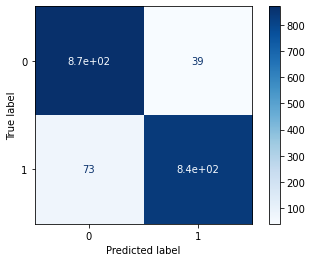

gender               0.020953
age                  0.245097
hypertension         0.280140
heart_disease        0.036892
ever_married         0.021065
work_type            0.152161
Residence_type       0.053007
avg_glucose_level    0.070773
bmi                  0.040253
smoking_status       0.079659
dtype: float64

---------------------------

Model:  Decision_Tree       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler', None),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                     

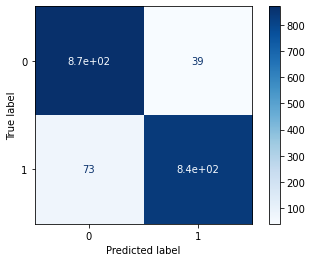

gender               0.020953
age                  0.245097
hypertension         0.280140
heart_disease        0.036892
ever_married         0.021065
work_type            0.152161
Residence_type       0.053007
avg_glucose_level    0.070773
bmi                  0.040253
smoking_status       0.079659
dtype: float64

---------------------------

Model:  Decision_Tree       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler', None),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                   

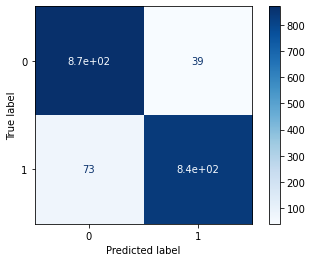

gender               0.020953
age                  0.245097
hypertension         0.280140
heart_disease        0.036892
ever_married         0.021065
work_type            0.152161
Residence_type       0.053007
avg_glucose_level    0.070773
bmi                  0.040253
smoking_status       0.079659
dtype: float64

---------------------------



In [338]:
model = Pipeline([
    ('scaler',StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42))
])

grid = {"scaler": [None, StandardScaler()],
             'model__min_samples_split': range(2, 4, 1),
             'model__min_samples_leaf': range(1, 4, 1), 
             'model__max_depth': [None] + [i for i in range(2, 7)],
             'model__max_features': range(2, len(df_num), 1)}

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    model,score=grid_search('Decision_Tree',model,grid,kf,X_train,X_test,y_train,y_test,fc_name,cond=False)
    print(pd.Series(model[1].feature_importances_,index=X_copy.columns))
    print('')
    print('---------------------------')
    print('')

In tutti i modelli si ottiengono degli ottimi risultati vicini al 95%. Guardando i coefficienti si può vedere come assumano importnza maggiore i valori legati all'ipertensione,al tipo di lavoro, al smoking status e all'età. 

Come avevamo potuto vedere attraverso i grafici, la possibilità di avere un ictus, aveva una certa dipendenza da questi paramentri, in particolare riguardo ipertensione e età.

Per quello che riguarda il tipo di lavoro, la sua dipendenza aumenta perchè nel set di dati c'è una fascia chiamata 'Never Worked',che guardando i dati sono per la maggior parte persono sotto i 20 anni (e quindi con minore probabilità di avere uno 'stroke', e quindi per certi versi è sempre legato ad un fattore di età).

##Random Forest

Model:  Random_Forest       Tipo:  Raw


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                           

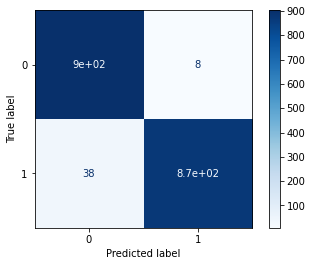

gender               0.082363
age                  0.233031
hypertension         0.140422
heart_disease        0.060153
ever_married         0.037199
work_type            0.098248
Residence_type       0.072059
avg_glucose_level    0.092766
bmi                  0.061951
smoking_status       0.121808
dtype: float64

----------------------

Model:  Random_Forest       Tipo:  Normalization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler', None),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                          

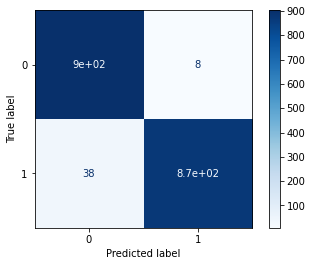

gender               0.082363
age                  0.233031
hypertension         0.140422
heart_disease        0.060153
ever_married         0.037199
work_type            0.098248
Residence_type       0.072059
avg_glucose_level    0.092766
bmi                  0.061951
smoking_status       0.121808
dtype: float64

----------------------

Model:  Random_Forest       Tipo:  Standardization


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler', None),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                        

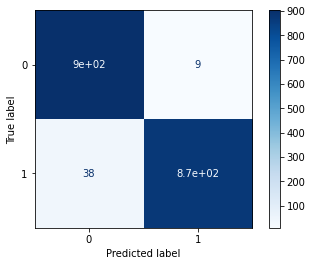

gender               0.082363
age                  0.233031
hypertension         0.140422
heart_disease        0.060153
ever_married         0.037199
work_type            0.098248
Residence_type       0.072059
avg_glucose_level    0.092766
bmi                  0.061951
smoking_status       0.121808
dtype: float64

----------------------



In [339]:
import math

model = Pipeline([
    ('scaler',StandardScaler()),
    ("model", RandomForestClassifier(n_jobs=-1, random_state=42))
])

grid = {"scaler": [None, StandardScaler()],
             'model__n_estimators': range(5, 10),
             'model__min_samples_split': range(2, 5), 
             'model__max_depth': [None] + [i for i in range(1, 3)],
             'model__max_features': [int(math.sqrt(len(df_num))), len(df_num) - 1]}

for fc_name, value in feature_scaling.items():
    X_train, X_test, y_train, y_test = value
    model,score=grid_search('Random_Forest',model,grid,kf,X_train,X_test,y_train,y_test,fc_name,cond=False)
    print(pd.Series(model[1].feature_importances_,index=X_copy.columns))

    print('')
    print('----------------------')
    print('')

Anche Random Forest, così come i modelli apena venuti prima, ottiene degli ottimi risultati, ponendo i coefficienti di valore maggiore su age,hypertension e smoking status.

##Note

I risultati ottenuti sono molto alti (sopratutto su alcuni modelli), ma bisogna fare dei chiarimenti:


> 1. I risultati per valutare i modelli (f1score, accuracy,ecc..) sono stati valutati su dei set che hanno subito un overfitting da parte dello smote, e quindi sono stati in qualche modo modificati.
> 2. Idealmente per avere dei risultati più fedeli, avrei dovuto eseguire l'overfitting solo sul training set, e lasciare intatto il test set. Tuttavia facendo così i dati relativi all' f1 score scendono drasticamente, passando ad un max di 95% ad un max di circa 20-30%. Questo perchè il dataset è giustamente sbilanciato (i casi senza stroke sono molto maggiore rispetto a quelli con stroke anche nella vita reale), per cui non è facile da predire se una persona in futuro avrà o meno un ictus a seconda dei dati in nostro possesso.
> 3. Il parametro più importante per valutare il dataset e i modelli in questo caso, a causa dell'elevato imbalanciamento dei dati, è l' f1 score, e non un l'accuracy. L'accuracy rimarebbe elevata anche in caso di un modello casuale, perchè la maggior parte dei dati è senza stroke (tutti 0).


#Confronto modelli

In [342]:
def model_comparison(mse_1, mse_2):
    d = np.abs(mse_1 - mse_2)
    variance = (mse_1 * (1 - mse_1)) / lungh + (mse_2 * (1 - mse_2)) / lungh
    d_min = d - 1.96 * np.sqrt(variance)
    d_max = d + 1.96 * np.sqrt(variance)
    return (d_min, d_max)

I modelli che prendo in considerazione sono quelli con affidabilità più alta e che sono vicini tra loro. Il confronto avviene tramite il mean square error dei modelli che si vogliono confrontare. Per semplicità consodera solo i dati standardizzati. 

##Decision Tree vs Random Forest

In [343]:
print('Interval {}'.format(np.round(model_comparison(models['Decision_Tree', 'Standardization']['MSE'], models['Random_Forest', 'Standardization']['MSE']), 4)))

Interval [0.0225 0.0489]


##Decision Tree vs SVC

In [344]:
print('Interval {}'.format(np.round(model_comparison(models['Decision_Tree','Standardization']['MSE'], models['SVC','Standardization']['MSE']), 4)))

Interval [0.0051 0.0388]


##Perceptron vs Logistic Regression

In [345]:
print('Interval {}'.format(np.round(model_comparison(models['Perceptron','Standardization']['MSE'], models['Logistic_Regression','Standardization']['MSE']), 4)))

Interval [0.0718 0.1301]


##Random Forest vs Perceptron

In [346]:
print('Interval {}'.format(np.round(model_comparison(models['Random_Forest','Standardization']['MSE'], models['Perceptron','Standardization']['MSE']), 4)))

Interval [0.2872 0.333 ]


##KNeighbors vs SVC

In [347]:
print('Interval {}'.format(np.round(model_comparison(models['KNeighbors','Standardization']['MSE'], models['SVC','Standardization']['MSE']), 4)))

Interval [0.0325 0.063 ]


##KNeighbors vs Logistic Regression

In [348]:
print('Interval {}'.format(np.round(model_comparison(models['KNeighbors','Standardization']['MSE'], models['Logistic_Regression','Standardization']['MSE']), 4)))

Interval [0.178  0.2205]


Come era prevedibile, modelli simili tra loro (come random forest, decision tree,svc, kneighbors, che hanno ottenuto punteggi simili tra loro), sono molto simili. Mentre ad esempio, KNeighbors e Logistic Regression risultano essere abbastanza diversi tra loro.

##Modello random

In [349]:
from sklearn.dummy import DummyClassifier

In [350]:
random = DummyClassifier(strategy="uniform", random_state=42)
random.fit(X_train, y_train)
for model,value in feature_scaling.items():
  X_train, X_test, y_train, y_test = value
  random = DummyClassifier(strategy="uniform", random_state=42)
  random1=random.fit(X_train, y_train)
  random_score = random.score(X_test, y_test)
  y_pred=random.predict(X_test)

  mse=mean_squared_error(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  models['Random',model]={'Model': random1,'Score': random_score}
  model=models['Random',model]
  model['Accuracy']=accuracy
  model['Recall']=recall
  model['Precision']=precision
  model['F1']=f1
  model['MSE']=mse

  print('Interval {}'.format(np.round(model_comparison(models['Perceptron','Standardization']['MSE'], mse), 4)))


Interval [0.1221 0.1853]
Interval [0.1221 0.1853]
Interval [0.1221 0.1853]


Come si può vedere, il modello Random risulta peggiore di tutti gli altri modelli,anche del perceptron

In [351]:
for model,value in feature_scaling.items():

  print(models['Random',model])

{'Model': DummyClassifier(constant=None, random_state=42, strategy='uniform'), 'Score': 0.5104281009879253, 'Accuracy': 0.5104281009879253, 'Recall': 0.5027442371020856, 'Precision': 0.5105908584169454, 'F1': 0.506637168141593, 'MSE': 0.48957189901207465}
{'Model': DummyClassifier(constant=None, random_state=42, strategy='uniform'), 'Score': 0.5104281009879253, 'Accuracy': 0.5104281009879253, 'Recall': 0.5027442371020856, 'Precision': 0.5105908584169454, 'F1': 0.506637168141593, 'MSE': 0.48957189901207465}
{'Model': DummyClassifier(constant=None, random_state=42, strategy='uniform'), 'Score': 0.5104281009879253, 'Accuracy': 0.5104281009879253, 'Recall': 0.5027442371020856, 'Precision': 0.5105908584169454, 'F1': 0.506637168141593, 'MSE': 0.48957189901207465}


#Riassunto punteggi ottenuti

Dai modelli ottenuti si può vedere come quelli che più si prestano a predirre il variabile della variabile target 'stroke' sono SVC,Decision Tree, Random Forest e KNeighbors.

Le variabile che all'interno del modello hanno una influenza maggiore sono invece:


> 1. Age
> 2. Tipo di lavoro
> 3. Hypertension
> 4. avg_glucose_level



